秋田県

In [1]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import plotly.express as px
import contextily as cx
import numpy as np
import matplotlib.pyplot as plt

# set font
import matplotlib as mpl

# for Mac
#mpl.rc('font',family='Hiragino Maru Gothic Pro')

# for PC
mpl.rc('font',family='MS Gothic')


In [2]:
# 空間データなので geopandas (gpd) でインポート

akitamesh1 = gpd.read_file('data2/SDDSWS5839.zip')
akitamesh2 = gpd.read_file('data2/SDDSWS5840.zip')
akitamesh3 = gpd.read_file('data2/SDDSWS5939.zip')
akitamesh4 = gpd.read_file('data2/SDDSWS5940.zip')
akitamesh5 = gpd.read_file('data2/SDDSWS6039.zip')
akitamesh6 = gpd.read_file('data2/SDDSWS6040.zip')

In [3]:
# combine all four mesh shapes
akitamesh = gpd.pd.concat([akitamesh1,akitamesh2,akitamesh3,akitamesh4,akitamesh5,akitamesh6])

<Axes: >

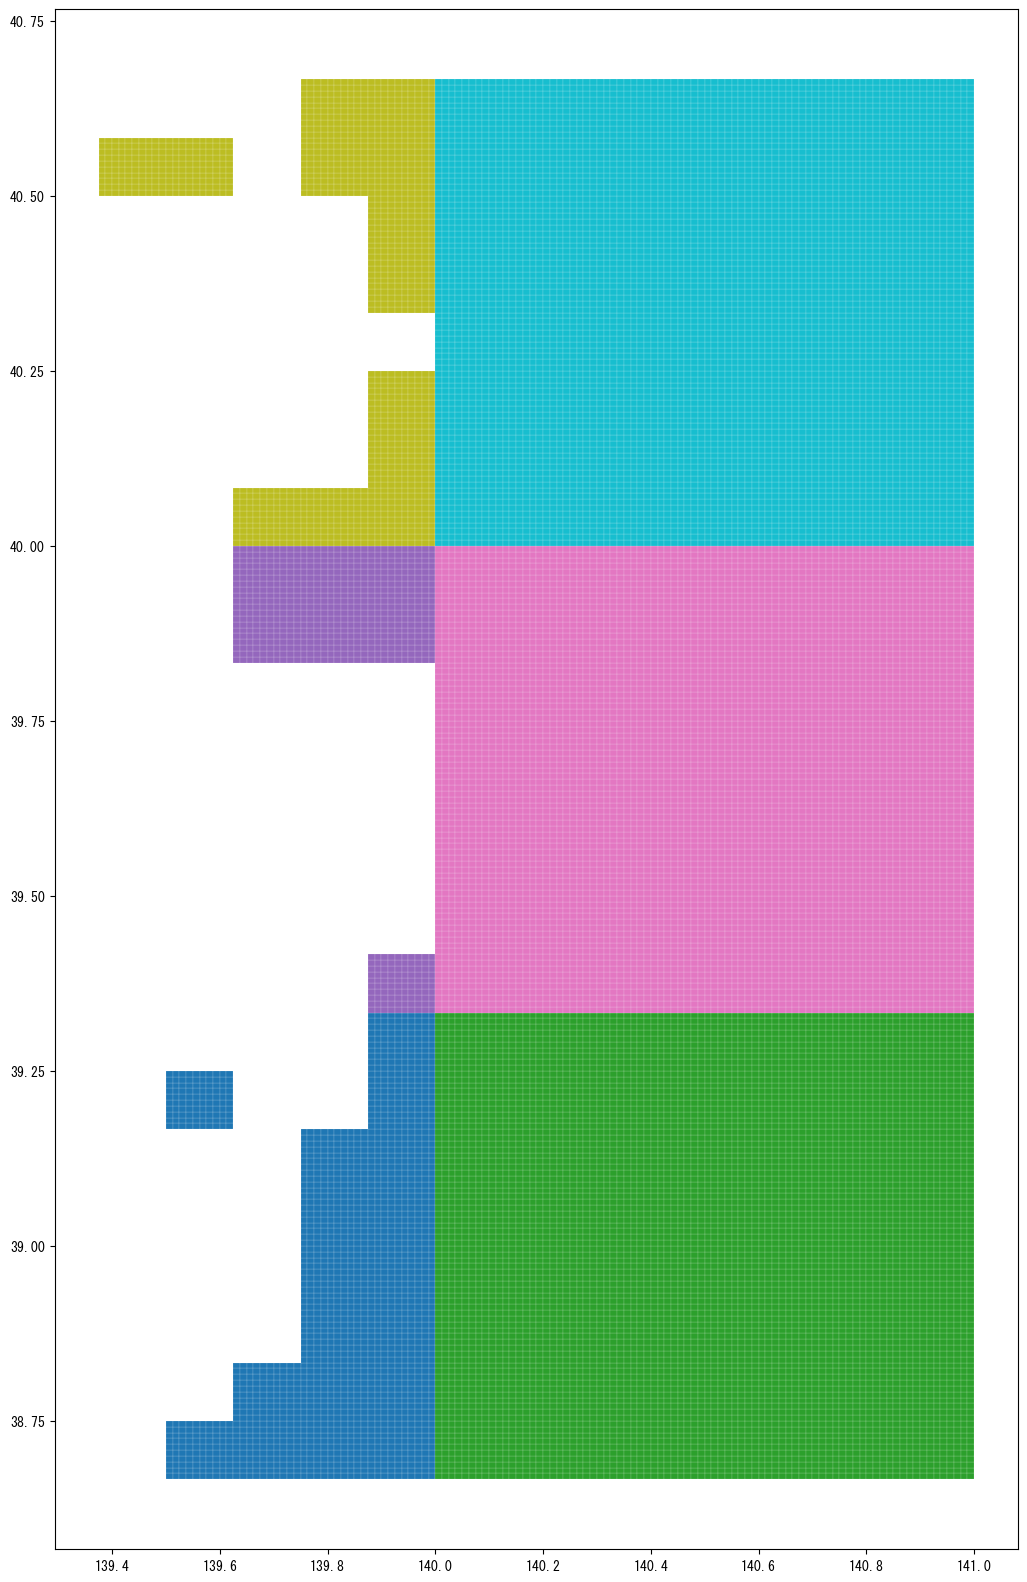

In [4]:
# quick plot
akitamesh.plot(figsize=(20,20),edgecolor='white',linewidth=0.1,column='MESH1_ID')

In [7]:
# csvデータなので pandas (pd) でインポート
# 文字化け予防のために encoding='cp932' 
akitadata1 = pd.read_csv('data2/tblT001100S5839.zip', encoding='cp932')
akitadata2 = pd.read_csv('data2/tblT001100S5840.zip', encoding='cp932')
akitadata3 = pd.read_csv('data2/tblT001100S5939.zip', encoding='cp932')
akitadata4 = pd.read_csv('data2/tblT001100S5940.zip', encoding='cp932')
akitadata5 = pd.read_csv('data2/tblT001100S6039.zip', encoding='cp932')
akitadata6 = pd.read_csv('data2/tblT001100S6040.zip', encoding='cp932')
akitadata7 = pd.read_csv('data2/tblT000846S5839.zip', encoding='cp932')
akitadata8 = pd.read_csv('data2/tblT000846S5840.zip', encoding='cp932')
akitadata9 = pd.read_csv('data2/tblT000846S5939.zip', encoding='cp932')
akitadata10 = pd.read_csv('data2/tblT000846S5940.zip', encoding='cp932')
akitadata11 = pd.read_csv('data2/tblT000846S6039.zip', encoding='cp932')
akitadata12 = pd.read_csv('data2/tblT000846S6040.zip', encoding='cp932')

In [9]:
akitadata6.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
0,NaN,NaN,NaN,NaN,人口（総数）,人口（総数） 男,人口（総数） 女,０～１４歳人口 総数,０～１４歳人口 男,０～１４歳人口 女,...,６人世帯数 一般世帯数,７人以上世帯数 一般世帯数,親族のみの世帯数 一般世帯数,核家族世帯数 一般世帯数,核家族以外の世帯数 一般世帯数,６歳未満世帯員のいる世帯数 一般世帯数,６５歳以上世帯員のいる世帯数 一般世帯数,世帯主の年齢が２０～２９歳の１人世帯数 一般世帯数,高齢単身世帯数 一般世帯数,高齢夫婦世帯数 一般世帯数
1,60400006.0,0.0,NaN,NaN,241,112,129,9,5,4,...,2,0,69,45,24,1,70,0,18,17
2,60400008.0,0.0,NaN,NaN,27,15,12,1,1,0,...,0,0,8,4,4,0,7,0,0,1
3,60400016.0,0.0,NaN,NaN,86,33,53,3,1,2,...,1,0,25,12,13,0,26,0,6,4
4,60400026.0,0.0,NaN,NaN,49,21,28,5,1,4,...,0,0,14,9,5,0,16,0,5,2


In [10]:
# 12のテーブルから１行目を削除
akitadata1 = akitadata1[1:]
akitadata2 = akitadata2[1:]
akitadata3 = akitadata3[1:]
akitadata4 = akitadata4[1:]
akitadata5 = akitadata5[1:]
akitadata6 = akitadata6[1:]
akitadata7 = akitadata7[1:]
akitadata8 = akitadata8[1:]
akitadata9 = akitadata9[1:]
akitadata10 = akitadata10[1:]
akitadata11 = akitadata11[1:]
akitadata12 = akitadata12[1:]

In [11]:
# 「＊」を非数に置き換える
akitadata1 = akitadata1.replace('*',np.nan)
akitadata2 = akitadata2.replace('*',np.nan)
akitadata3 = akitadata3.replace('*',np.nan)
akitadata4 = akitadata4.replace('*',np.nan)
akitadata5 = akitadata5.replace('*',np.nan)
akitadata6 = akitadata6.replace('*',np.nan)
akitadata7 = akitadata7.replace('*',np.nan)
akitadata8 = akitadata8.replace('*',np.nan)
akitadata9 = akitadata9.replace('*',np.nan)
akitadata10 = akitadata10.replace('*',np.nan)
akitadata11 = akitadata11.replace('*',np.nan)
akitadata12 = akitadata12.replace('*',np.nan)

In [12]:
akitadata2020 = pd.concat([akitadata1,akitadata2,akitadata3,akitadata4,akitadata5,akitadata6])
akitadata2015 = pd.concat([akitadata7,akitadata8,akitadata9,akitadata10,akitadata11,akitadata12])
akitadata2015.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T000846001,T000846002,T000846003,T000846004,T000846005,T000846006,...,T000846032,T000846033,T000846034,T000846035,T000846036,T000846037,T000846038,T000846039,T000846040,T000846041
1,58390408.0,2.0,58390409.0,NaN,9,3,6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,58390409.0,1.0,NaN,58390408,304,130,174,50,17,33,...,7,8,80,47,33,11,84,0,16,15
3,58390500.0,0.0,NaN,NaN,19,7,12,0,0,0,...,0,0,4,3,1,0,4,0,0,1
4,58390509.0,0.0,NaN,NaN,63,31,32,10,7,3,...,1,2,14,5,9,3,16,0,5,1
5,58390519.0,0.0,NaN,NaN,60,27,33,8,2,6,...,1,2,15,5,10,2,15,0,2,1


In [13]:
# get rid of HTKSYORI, HTKSAKI, GASSAN
columns=['HTKSYORI', 'HTKSAKI', 'GASSAN']
akitadata2015=akitadata2015.drop(columns=columns)

columns=['HTKSYORI', 'HTKSAKI', 'GASSAN']
akitadata2020=akitadata2020.drop(columns=columns)

# combine 2015 and 2020 data
akitadata = pd.merge(akitadata2020,akitadata2015,on='KEY_CODE')

# check data info
akitadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6664 entries, 0 to 6663
Data columns (total 92 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    6664 non-null   float64
 1   T001100001  6664 non-null   object 
 2   T001100002  6664 non-null   object 
 3   T001100003  6664 non-null   object 
 4   T001100004  5672 non-null   object 
 5   T001100005  5672 non-null   object 
 6   T001100006  5672 non-null   object 
 7   T001100007  5672 non-null   object 
 8   T001100008  5672 non-null   object 
 9   T001100009  5672 non-null   object 
 10  T001100010  5672 non-null   object 
 11  T001100011  5672 non-null   object 
 12  T001100012  5672 non-null   object 
 13  T001100013  5672 non-null   object 
 14  T001100014  5672 non-null   object 
 15  T001100015  5672 non-null   object 
 16  T001100016  5672 non-null   object 
 17  T001100017  5672 non-null   object 
 18  T001100018  5672 non-null   object 
 19  T001100019  5672 non-null  

In [15]:
# まずはカラムをアウトプット
akitadata.columns

Index(['KEY_CODE', 'T001100001', 'T001100002', 'T001100003', 'T001100004',
       'T001100005', 'T001100006', 'T001100007', 'T001100008', 'T001100009',
       'T001100010', 'T001100011', 'T001100012', 'T001100013', 'T001100014',
       'T001100015', 'T001100016', 'T001100017', 'T001100018', 'T001100019',
       'T001100020', 'T001100021', 'T001100022', 'T001100023', 'T001100024',
       'T001100025', 'T001100026', 'T001100027', 'T001100028', 'T001100029',
       'T001100030', 'T001100031', 'T001100032', 'T001100033', 'T001100034',
       'T001100035', 'T001100036', 'T001100037', 'T001100038', 'T001100039',
       'T001100040', 'T001100041', 'T001100042', 'T001100043', 'T001100044',
       'T001100045', 'T001100046', 'T001100047', 'T001100048', 'T001100049',
       'T001100050', 'T000846001', 'T000846002', 'T000846003', 'T000846004',
       'T000846005', 'T000846006', 'T000846007', 'T000846008', 'T000846009',
       'T000846010', 'T000846011', 'T000846012', 'T000846013', 'T000846014',
 

In [16]:
# 1番目以降をアウトプット
akitadata.columns[1:]

Index(['T001100001', 'T001100002', 'T001100003', 'T001100004', 'T001100005',
       'T001100006', 'T001100007', 'T001100008', 'T001100009', 'T001100010',
       'T001100011', 'T001100012', 'T001100013', 'T001100014', 'T001100015',
       'T001100016', 'T001100017', 'T001100018', 'T001100019', 'T001100020',
       'T001100021', 'T001100022', 'T001100023', 'T001100024', 'T001100025',
       'T001100026', 'T001100027', 'T001100028', 'T001100029', 'T001100030',
       'T001100031', 'T001100032', 'T001100033', 'T001100034', 'T001100035',
       'T001100036', 'T001100037', 'T001100038', 'T001100039', 'T001100040',
       'T001100041', 'T001100042', 'T001100043', 'T001100044', 'T001100045',
       'T001100046', 'T001100047', 'T001100048', 'T001100049', 'T001100050',
       'T000846001', 'T000846002', 'T000846003', 'T000846004', 'T000846005',
       'T000846006', 'T000846007', 'T000846008', 'T000846009', 'T000846010',
       'T000846011', 'T000846012', 'T000846013', 'T000846014', 'T000846015',

In [17]:
# 元のデータを入れ替える
akitadata[akitadata.columns[1:]]=akitadata[akitadata.columns[1:]].astype(float)
# check!
akitadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6664 entries, 0 to 6663
Data columns (total 92 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    6664 non-null   float64
 1   T001100001  6664 non-null   float64
 2   T001100002  6664 non-null   float64
 3   T001100003  6664 non-null   float64
 4   T001100004  5672 non-null   float64
 5   T001100005  5672 non-null   float64
 6   T001100006  5672 non-null   float64
 7   T001100007  5672 non-null   float64
 8   T001100008  5672 non-null   float64
 9   T001100009  5672 non-null   float64
 10  T001100010  5672 non-null   float64
 11  T001100011  5672 non-null   float64
 12  T001100012  5672 non-null   float64
 13  T001100013  5672 non-null   float64
 14  T001100014  5672 non-null   float64
 15  T001100015  5672 non-null   float64
 16  T001100016  5672 non-null   float64
 17  T001100017  5672 non-null   float64
 18  T001100018  5672 non-null   float64
 19  T001100019  5672 non-null  

In [18]:
# KEY_CODEをfloatに
akitamesh['KEY_CODE']=akitamesh['KEY_CODE'].astype(float)

# merge the data
akitamesh = akitamesh.merge(akitadata, on='KEY_CODE')

# check!
akitamesh.sample(5)

,KEY_CODE,MESH1_ID,MESH2_ID,MESH3_ID,OBJ_ID,geometry,T001100001,T001100002,T001100003,T001100004,...,T000846032,T000846033,T000846034,T000846035,T000846036,T000846037,T000846038,T000846039,T000846040,T000846041
4198,59403197.0,5940,31,97,2598,"POLYGON ((140.22500 39.65833, 140.21250 39.658...",141.0,65.0,76.0,16.0,...,4.0,3.0,48.0,29.0,19.0,6.0,40.0,0.0,3.0,7.0
4376,59403777.0,5940,37,77,3178,"POLYGON ((140.97500 39.64167, 140.96250 39.641...",4.0,3.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3563,59401275.0,5940,12,75,1076,"POLYGON ((140.32500 39.47500, 140.31250 39.475...",11.0,5.0,6.0,0.0,...,0.0,0.0,5.0,4.0,1.0,0.0,6.0,0.0,1.0,2.0
4475,59404155.0,5940,41,55,3356,"POLYGON ((140.20000 39.70833, 140.18750 39.708...",96.0,47.0,49.0,7.0,...,1.0,3.0,29.0,17.0,12.0,1.0,25.0,0.0,2.0,6.0
5789,60402567.0,6040,25,67,2168,"POLYGON ((140.72500 40.21667, 140.71250 40.216...",112.0,53.0,59.0,12.0,...,3.0,2.0,31.0,15.0,16.0,3.0,31.0,0.0,3.0,6.0


<Axes: >

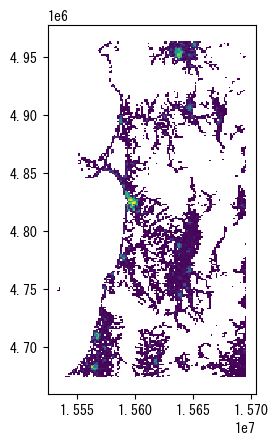

In [19]:
# reproject to 3857 (web mercator)
akitamesh = akitamesh.to_crs(3857)

# make a quick plot
akitamesh.plot(column='T001100001')

<Axes: >

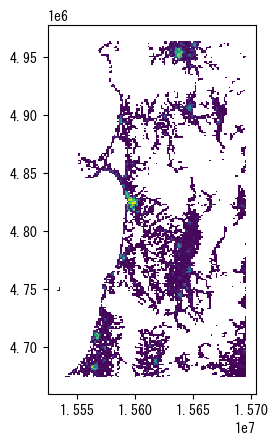

In [20]:
# make a quick plot
akitamesh.plot(column='T000846001')

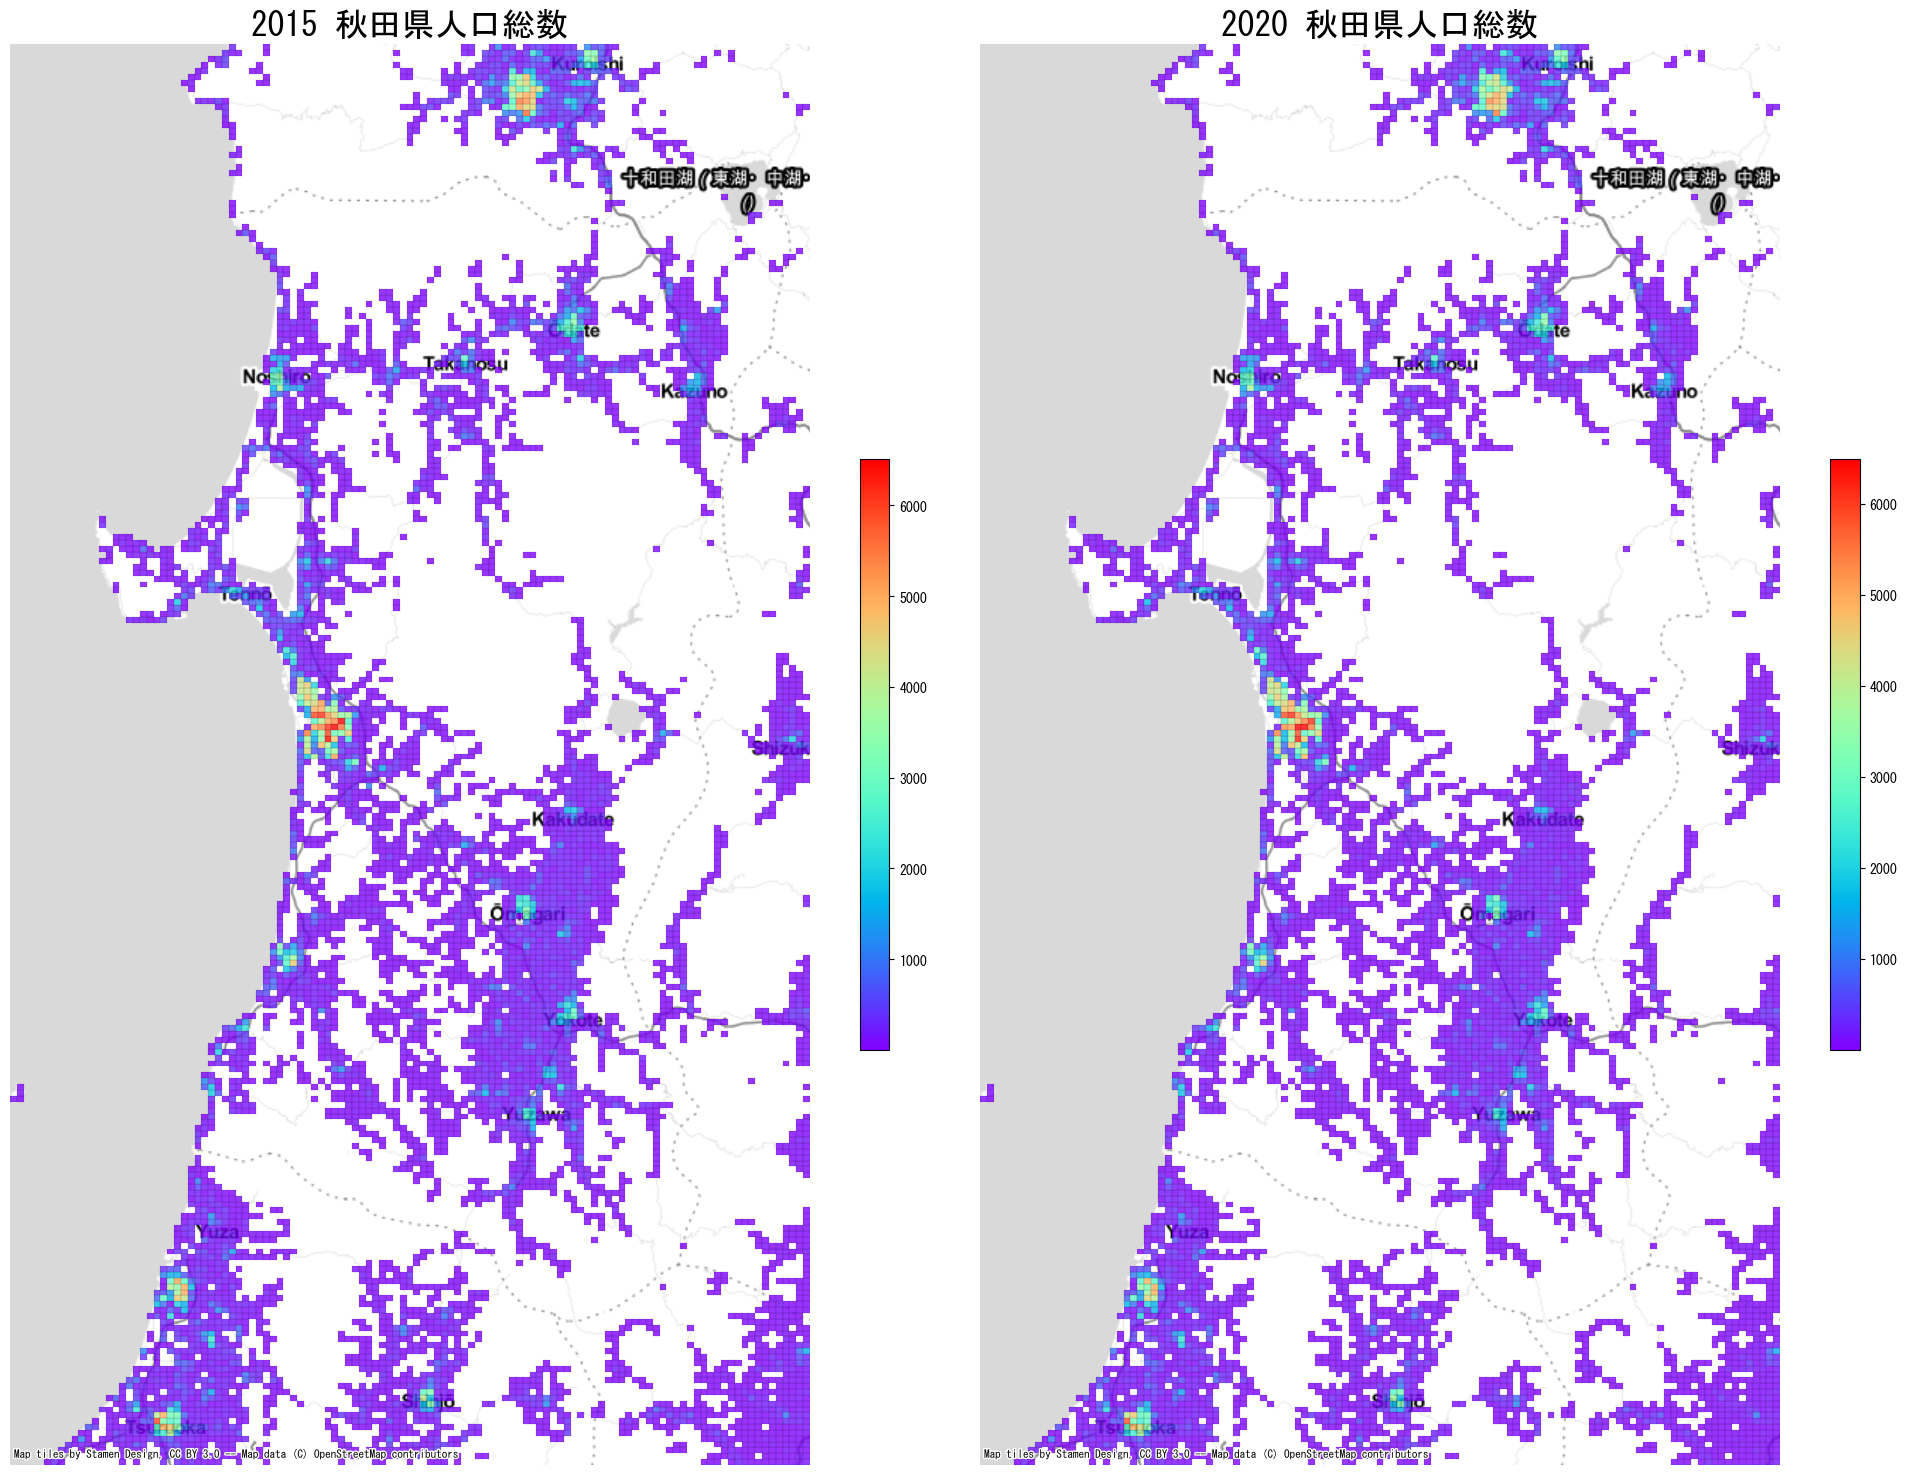

In [24]:
# population map
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,20)) # 1 row, 2 columns, side by side

# 2015 population
akitamesh.plot(ax = ax[0], # 左のマップ
    column='T000846001',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='rainbow',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
)

# 2020 population
akitamesh.plot(ax = ax[1], # 右のマップ
    column='T001100001',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='rainbow',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
)

# hide axes
ax[0].axis('off') # 左
ax[1].axis('off') # 右

# title
ax[0].set_title('2015 秋田県人口総数',fontsize=24); # 左
ax[1].set_title('2020 秋田県人口総数',fontsize=24); # 右

# Get the total bounds of the geometries
xmin, ymin, xmax, ymax = akitamesh.total_bounds

# Set the plot limits based on the total bounds
ax[0].set_xlim(xmin, xmax) # 左
ax[0].set_ylim(ymin, ymax) # 左 
ax[1].set_xlim(xmin, xmax) # 右
ax[1].set_ylim(ymin, ymax) # 右

# サブプロット間のスペースを調整
plt.tight_layout()

# add basemap
cx.add_basemap(ax[0],source=cx.providers.Stamen.TonerLite) # 左
cx.add_basemap(ax[1],source=cx.providers.Stamen.TonerLite) # 右

千葉よりもメッシュが多かったので似たような名前のデータを使うプログラムを書く時にはCtrl＋ｄが大活躍しました!


よく見ると中央左の赤い部分や、タイトルのすぐ下の赤い部分が小さくなっています。

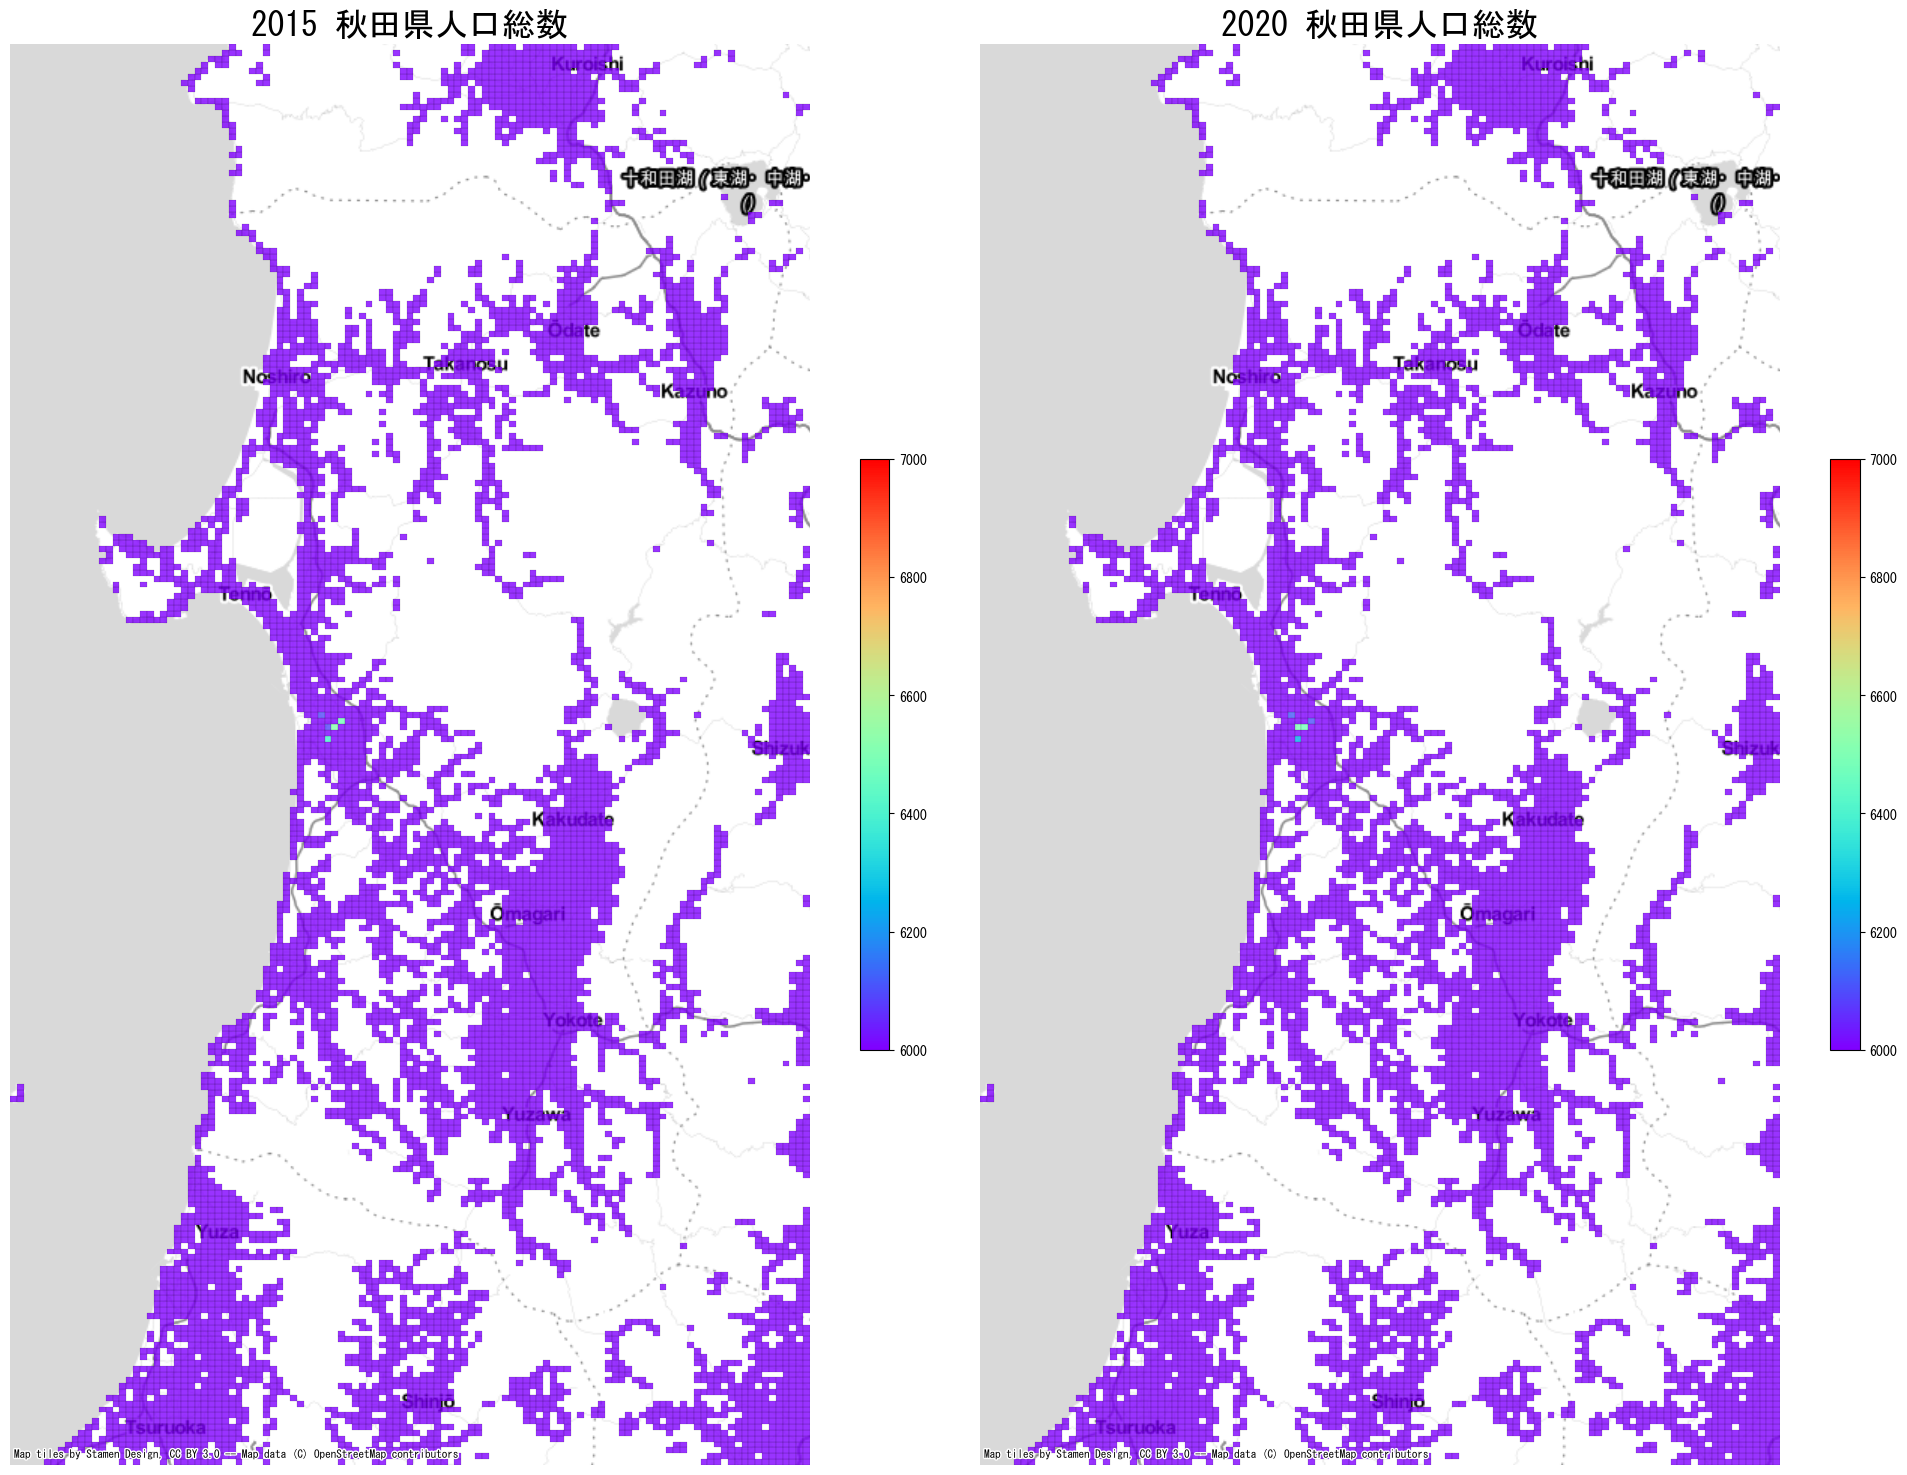

In [32]:
# population map
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,20)) # 1 row, 2 columns, side by side

# 2015 population
akitamesh.plot(ax = ax[0], # 左のマップ
    column='T000846001',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='spring_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin = 6000,
         vmax = 6500
)

# 2020 population
akitamesh.plot(ax = ax[1], # 右のマップ
    column='T001100001',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='spring_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin = 6000,
         vmax = 6500
)

# hide axes
ax[0].axis('off') # 左
ax[1].axis('off') # 右

# title
ax[0].set_title('2015 秋田県人口総数',fontsize=24); # 左
ax[1].set_title('2020 秋田県人口総数',fontsize=24); # 右

# Get the total bounds of the geometries
xmin, ymin, xmax, ymax = akitamesh.total_bounds

# Set the plot limits based on the total bounds
ax[0].set_xlim(xmin, xmax) # 左
ax[0].set_ylim(ymin, ymax) # 左 
ax[1].set_xlim(xmin, xmax) # 右
ax[1].set_ylim(ymin, ymax) # 右

# サブプロット間のスペースを調整
plt.tight_layout()

# add basemap
cx.add_basemap(ax[0],source=cx.providers.Stamen.TonerLite) # 左
cx.add_basemap(ax[1],source=cx.providers.Stamen.TonerLite) # 右

見にくいけど中央左の変化が一番わかりやすいのがこれでした。

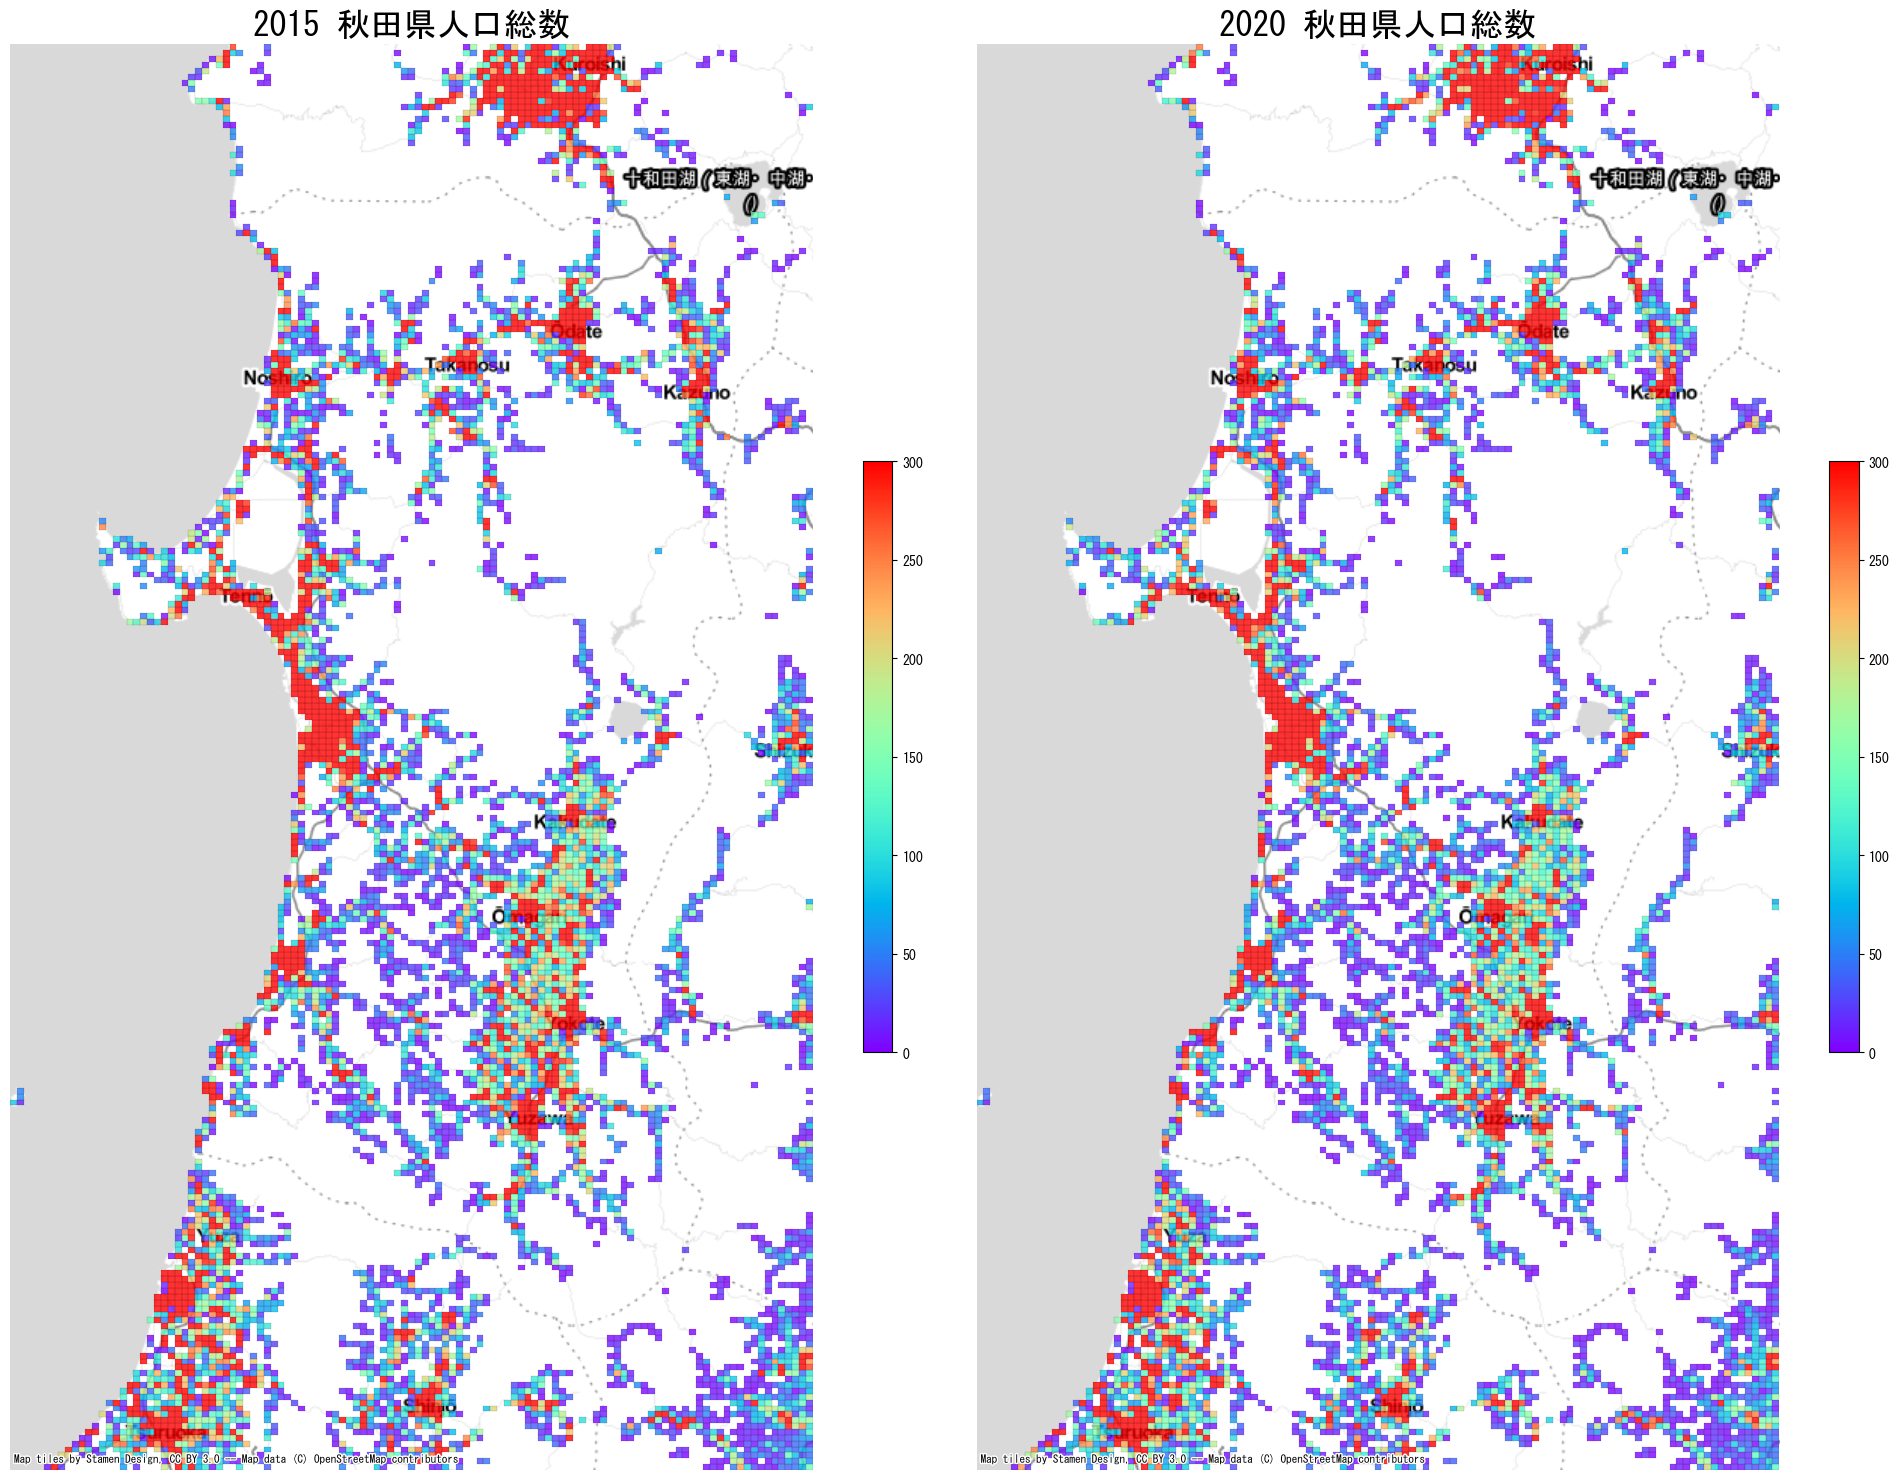

In [40]:
# population map
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,20)) # 1 row, 2 columns, side by side

# 2015 population
akitamesh.plot(ax = ax[0], # 左のマップ
    column='T000846001',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='rainbow',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin = 0,
         vmax = 300
)

# 2020 population
akitamesh.plot(ax = ax[1], # 右のマップ
    column='T001100001',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='rainbow',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin = 0,
         vmax = 300
)

# hide axes
ax[0].axis('off') # 左
ax[1].axis('off') # 右

# title
ax[0].set_title('2015 秋田県人口総数',fontsize=24); # 左
ax[1].set_title('2020 秋田県人口総数',fontsize=24); # 右

# Get the total bounds of the geometries
xmin, ymin, xmax, ymax = akitamesh.total_bounds

# Set the plot limits based on the total bounds
ax[0].set_xlim(xmin, xmax) # 左
ax[0].set_ylim(ymin, ymax) # 左 
ax[1].set_xlim(xmin, xmax) # 右
ax[1].set_ylim(ymin, ymax) # 右

# サブプロット間のスペースを調整
plt.tight_layout()

# add basemap
cx.add_basemap(ax[0],source=cx.providers.Stamen.TonerLite) # 左
cx.add_basemap(ax[1],source=cx.providers.Stamen.TonerLite) # 右

↑　これは数十人単位の変化です。